# Load and analyze flights data

#### EUROCONTROL R&D archive data & information can be found here: https://www.eurocontrol.int/dashboard/rnd-data-archive

#### *The results presented in this notebook are not relevant as the data sample is just a tiny extraction of a data archive. The purpose is only to show how to use pandas functions to get such information*

In [1]:
%load_ext lab_black
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from archive import Archive

#### <br> Local path of your data archive (zip file)

In [3]:
archive_path = "mysample.zip"

#### Load archive

In [4]:
archive = Archive(archive_path)

Loading archive:  mysample
Flights_20181201_20181231.csv.gz loaded
Flight_Points_Filed_20181201_20181231.csv.gz loaded
Flight_Points_Actual_20181201_20181231.csv.gz loaded
Flight_FIRs_Filed_20181201_20181231.csv.gz loaded
Flight_FIRs_Actual_20181201_20181231.csv.gz loaded
Flight_AUAs_Filed_20181201_20181231.csv.gz loaded
Flight_AUAs_Actual_20181201_20181231.csv.gz loaded
Route_1812.csv.gz loaded
FIR_1812.csv.gz loaded


#### If you want to use other data than flights, consider filtering the archive as shown in demo_archive_filtering

#### Let's focus here on flights data

In [5]:
archive.flights_df.head()

,ECTRL ID,ADEP,ADEP Latitude,ADEP Longitude,ADES,ADES Latitude,ADES Longitude,FILED OFF BLOCK TIME,FILED ARRIVAL TIME,ACTUAL OFF BLOCK TIME,ACTUAL ARRIVAL TIME,AC Type,AC Operator,AC Registration,ICAO Flight Type,STATFOR Market Segment,Requested FL,Actual Distance Flown (nm)
0,226004653,KATL,33.63333,-84.43333,EGCC,53.35389,-2.27500,2018-12-22 23:00:00,2018-12-23 06:17:12,2018-12-23 00:23:00,2018-12-23 07:30:58,B744,VIR,GVROS,S,Traditional Scheduled,350.0,3597
1,226004729,TFFF,14.58333,-61.00000,LFPO,48.72333,2.37944,2018-12-22 23:10:00,2018-12-23 07:06:21,2018-12-23 00:48:25,2018-12-23 08:51:15,B77W,AFR,FGSQR,S,Traditional Scheduled,310.0,3803
2,226004794,KEWR,40.69667,-74.16833,EDDF,50.03333,8.57056,2018-12-22 23:20:00,2018-12-23 06:18:31,2018-12-23 00:08:00,2018-12-23 07:11:05,B748,DLH,DABYG,S,Traditional Scheduled,350.0,3504
3,226004812,URKK,45.03472,39.17000,OMDB,25.24917,55.36000,2018-12-22 23:25:00,2018-12-23 03:05:20,2018-12-23 00:05:00,2018-12-23 03:44:17,B738,ZZZ,A6FEU,S,Lowcost,290.0,1554
4,226004814,LFPG,49.00972,2.54778,VIDP,28.56861,77.11333,2018-12-22 23:25:00,2018-12-23 07:22:31,2018-12-23 00:04:00,2018-12-23 07:38:23,B77L,FDX,N868FD,S,All-Cargo,340.0,3784


#### Let's analyze flights from LFPG airport

In [6]:
adep = "LFPG"  # CDG
df = archive.flights_df.query("ADEP == @adep")
df.head()

,ECTRL ID,ADEP,ADEP Latitude,ADEP Longitude,ADES,ADES Latitude,ADES Longitude,FILED OFF BLOCK TIME,FILED ARRIVAL TIME,ACTUAL OFF BLOCK TIME,ACTUAL ARRIVAL TIME,AC Type,AC Operator,AC Registration,ICAO Flight Type,STATFOR Market Segment,Requested FL,Actual Distance Flown (nm)
4,226004814,LFPG,49.00972,2.54778,VIDP,28.56861,77.11333,2018-12-22 23:25:00,2018-12-23 07:22:31,2018-12-23 00:04:00,2018-12-23 07:38:23,B77L,FDX,N868FD,S,All-Cargo,340.0,3784
52,226005060,LFPG,49.00972,2.54778,LIMC,45.63000,8.72306,2018-12-23 00:01:00,2018-12-23 01:34:38,2018-12-23 00:10:00,2018-12-23 01:29:44,B77L,FDX,N869FD,S,All-Cargo,350.0,376
54,226005062,LFPG,49.00972,2.54778,EDDK,50.86583,7.14278,2018-12-23 00:01:00,2018-12-23 01:06:07,2018-12-23 00:09:00,2018-12-23 01:16:32,B77L,FDX,N842FD,S,All-Cargo,220.0,255
72,226005086,LFPG,49.00972,2.54778,LEMD,40.47222,-3.56083,2018-12-23 00:07:00,2018-12-23 02:08:29,2018-12-23 00:20:00,2018-12-23 02:13:41,A306,FDX,N658FE,S,All-Cargo,330.0,605
250,226005279,LFPG,49.00972,2.54778,RKSI,37.46250,126.43917,2018-12-23 01:00:00,2018-12-23 11:47:33,2018-12-23 00:12:00,2018-12-23 10:49:37,B77L,KAL,HL8226,S,Traditional Scheduled,340.0,4996


#### Analysis of the distance flown of the flights

In [7]:
dist_min = df["Actual Distance Flown (nm)"].min()
dist_max = df["Actual Distance Flown (nm)"].max()
dist_mean = df["Actual Distance Flown (nm)"].mean()
print(f"Distance flown (nm): min={dist_min} max={dist_max} mean={dist_mean}")

Distance flown (nm): min=48 max=6396 mean=1447.0647058823529


#### Determine the destination of the longest flight

In [8]:
df.loc[df["Actual Distance Flown (nm)"].idxmax()].ADES

'SCEL'

#### Get the top ten destination airports

In [9]:
df["ADES"].value_counts().nlargest(10)

EGLL    28
EHAM    22
LEBL    22
LIRF    22
LEMD    21
DAAG    21
EDDF    19
UUEE    18
LFMN    17
LSGG    17
Name: ADES, dtype: int64

#### Plot the distribution of requested FL

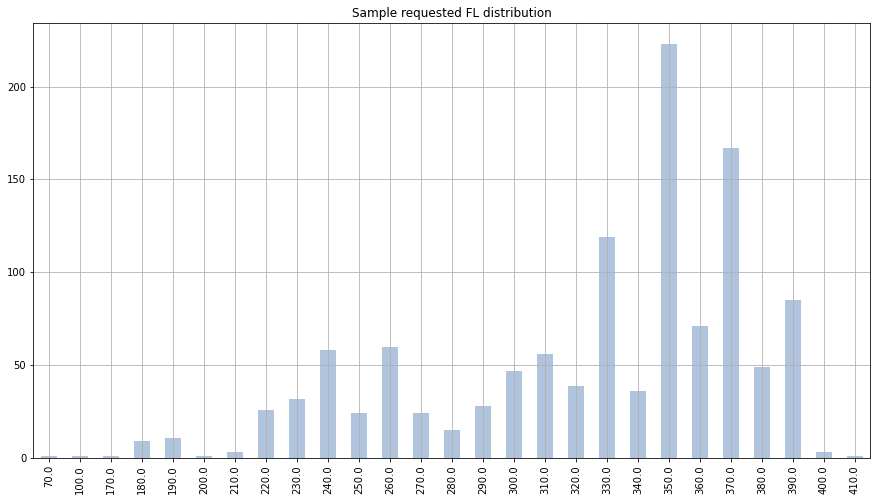

In [10]:
df["Requested FL"].value_counts().sort_index().plot(
    figsize=(15, 8),
    kind="bar",
    grid=True,
    title="Sample requested FL distribution",
    color="lightsteelblue",
)
plt.savefig("fldistribution.png")
plt.show()

#### Plot top 20 aircraft types 

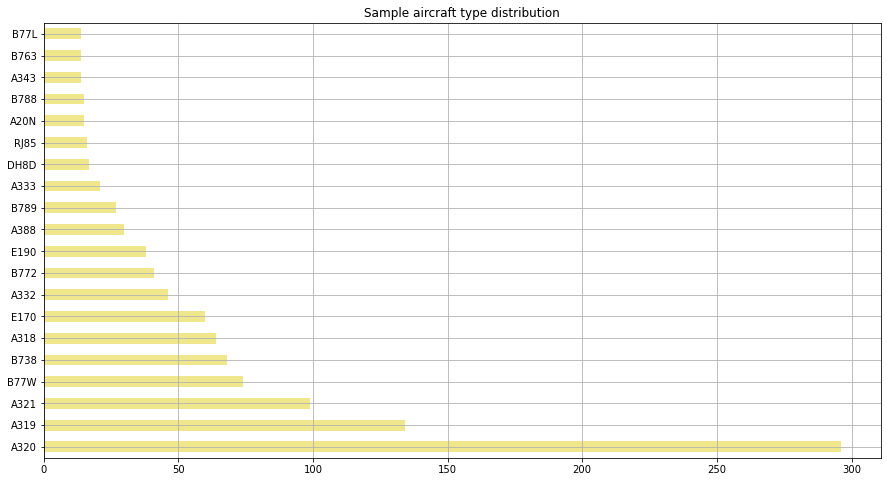

In [11]:
df["AC Type"].value_counts().nlargest(20).plot(
    figsize=(15, 8),
    kind="barh",
    grid=True,
    title="Sample aircraft type distribution",
    color="khaki",
)
plt.show()

#### Market segment

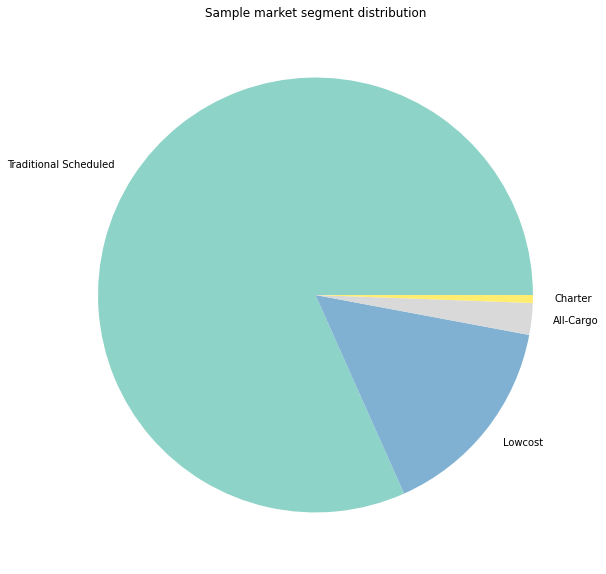

In [12]:
ax = (
    df["STATFOR Market Segment"]
    .value_counts()
    .plot(
        figsize=(10, 10),
        kind="pie",
        title="Sample market segment distribution",
        colormap="Set3",
    )
)
ax.set_ylabel("")
plt.show()